# Project 1: Visualization

In [275]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats

In [276]:
df=pd.read_csv('Code/Trying.csv')
print(df.shape)
#df=df[df['G']>20]
print(df.shape)
#df=df[df['MP']>=5]
print(df.shape)

(2355, 85)
(2355, 85)
(2355, 85)


In [277]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,3-10FG%,10-16FG%,16-3PFG%,2P%A,3P%A,Dunk%FGA,Dunks,C3%3PA,C33P%,Season
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.417,0.276,0.200,0.629,1.000,0.141,49,0.444,0.250,2023
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,0.500,0.400,NaN,0.503,NaN,0.163,41,1.000,0.000,2023
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,0.478,0.498,0.288,0.601,1.000,0.136,140,0.000,NaN,2023
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.494,0.400,0.444,0.762,0.988,0.054,17,0.412,0.457,2023
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,0.471,0.250,0.444,0.680,0.968,0.118,54,0.391,0.365,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,Thaddeus Young,PF,30,IND,81,81,30.7,5.5,10.4,0.527,...,0.456,0.303,0.226,0.554,0.941,0.050,36,0.445,0.354,2019
2351,Trae Young,PG,20,ATL,81,81,30.9,6.5,15.5,0.418,...,0.419,0.448,0.316,0.211,0.423,0.000,0,0.037,0.389,2019
2352,Cody Zeller,C,26,CHO,49,47,25.4,3.9,7.0,0.551,...,0.434,0.211,0.333,0.745,1.000,0.139,43,0.000,NaN,2019
2353,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.406,0.471,0.286,0.683,NaN,0.082,25,NaN,NaN,2019


In [278]:
columns=df.columns.values.tolist()
columns_wanted=['eFG%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'LostBall', 'Dist.', '%2PFGA', '3P%', '0-3%FGA', '3-10%FGA', '10-16%FGA', '16-3P%FGA', '0-3FG%', '3-10FG%', '10-16FG%', '16-3PFG%', '2P%A', '3P%A', 'Dunk%FGA', 'PG%','SG%','SF%','PF%','C%','C3%3PA']
columns_not_wanted=[]
for i in columns:
    if i not in columns_wanted:
        columns_not_wanted.append(i)

#how to combine players that are traded mid season
df_stats=df.drop(columns=columns_not_wanted)


In [279]:
convert_dict={}
for i in columns_wanted:
    convert_dict[i]=str
df_stats=df_stats.astype(convert_dict)
#['PG%','SG%','SF%','PF%','C%']

df_stats['eFG%']=df_stats['eFG%'].str.replace('%','')
df_stats['FT%']=df_stats['FT%'].str.replace('%','')
df_stats['AST']=df_stats['AST'].str.replace('%','')
df_stats['STL']=df_stats['STL'].str.replace('%','')
df_stats['BLK']=df_stats['BLK'].str.replace('%','')
df_stats['TOV']=df_stats['TOV'].str.replace('%','')
df_stats['LostBall']=df_stats['LostBall'].str.replace('%','')
df_stats['Dist.']=df_stats['Dist.'].str.replace('%','')
df_stats['%2PFGA']=df_stats['%2PFGA'].str.replace('%','')
df_stats['3P%']=df_stats['3P%'].str.replace('%','')
df_stats['0-3%FGA']=df_stats['0-3%FGA'].str.replace('%','')
df_stats['3-10%FGA']=df_stats['3-10%FGA'].str.replace('%','')
df_stats['10-16%FGA']=df_stats['10-16%FGA'].str.replace('%','')
df_stats['16-3P%FGA']=df_stats['16-3P%FGA'].str.replace('%','')
df_stats['0-3FG%']=df_stats['0-3FG%'].str.replace('%','')
df_stats['3-10FG%']=df_stats['3-10FG%'].str.replace('%','')
df_stats['10-16FG%']=df_stats['10-16FG%'].str.replace('%','')
df_stats['16-3PFG%']=df_stats['16-3PFG%'].str.replace('%','')
df_stats['2P%A']=df_stats['2P%A'].str.replace('%','')
df_stats['3P%A']=df_stats['3P%A'].str.replace('%','')
df_stats['Dunk%FGA']=df_stats['Dunk%FGA'].str.replace('%','')
df_stats['C3%3PA']=df_stats['C3%3PA'].str.replace('%','')
df_stats['PG%']=df_stats['PG%'].str.replace('%','')
df_stats['SG%']=df_stats['SG%'].str.replace('%','')
df_stats['SF%']=df_stats['SF%'].str.replace('%','')
df_stats['PF%']=df_stats['PF%'].str.replace('%','')
df_stats['C%']=df_stats['C%'].str.replace('%','')

df_stats['PG%']

0       nan
1       nan
2       nan
3        38
4       nan
       ... 
2350    nan
2351    100
2352    nan
2353    nan
2354    nan
Name: PG%, Length: 2355, dtype: object

In [280]:
#PF% PG% AF% and SG% 
#normalized_df.to_csv('normalized_df.csv')
#normalized_df

df_stats['PG%']
convert_dict={}
for i in columns_wanted:
    convert_dict[i]=float
print(convert_dict)

df_stats=df_stats.astype(convert_dict)
df_stats=df_stats.fillna(0)
df_stats


{'eFG%': <class 'float'>, 'FT%': <class 'float'>, 'TRB': <class 'float'>, 'AST': <class 'float'>, 'STL': <class 'float'>, 'BLK': <class 'float'>, 'TOV': <class 'float'>, 'LostBall': <class 'float'>, 'Dist.': <class 'float'>, '%2PFGA': <class 'float'>, '3P%': <class 'float'>, '0-3%FGA': <class 'float'>, '3-10%FGA': <class 'float'>, '10-16%FGA': <class 'float'>, '16-3P%FGA': <class 'float'>, '0-3FG%': <class 'float'>, '3-10FG%': <class 'float'>, '10-16FG%': <class 'float'>, '16-3PFG%': <class 'float'>, '2P%A': <class 'float'>, '3P%A': <class 'float'>, 'Dunk%FGA': <class 'float'>, 'PG%': <class 'float'>, 'SG%': <class 'float'>, 'SF%': <class 'float'>, 'PF%': <class 'float'>, 'C%': <class 'float'>, 'C3%3PA': <class 'float'>}


,3P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PG%,SG%,...,10-16%FGA,16-3P%FGA,0-3FG%,3-10FG%,10-16FG%,16-3PFG%,2P%A,3P%A,Dunk%FGA,C3%3PA
0,0.269,0.521,0.702,6.0,0.9,0.6,0.5,1.1,0.0,0.0,...,0.072,0.012,0.734,0.417,0.276,0.200,0.629,1.000,0.141,0.444
1,0.000,0.597,0.364,11.5,2.3,0.9,1.1,1.9,0.0,0.0,...,0.019,0.000,0.645,0.500,0.400,0.000,0.503,0.000,0.163,1.000
2,0.083,0.541,0.806,9.2,3.2,1.2,0.8,2.5,0.0,0.0,...,0.265,0.047,0.714,0.478,0.498,0.288,0.601,1.000,0.136,0.000
3,0.355,0.532,0.812,2.1,1.1,0.3,0.3,0.7,38.0,40.0,...,0.026,0.023,0.621,0.494,0.400,0.444,0.762,0.988,0.054,0.412
4,0.353,0.560,0.750,4.8,1.3,0.6,0.6,0.8,0.0,0.0,...,0.030,0.017,0.707,0.471,0.250,0.444,0.680,0.968,0.118,0.391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,0.349,0.557,0.644,6.5,2.5,1.5,0.4,1.5,0.0,0.0,...,0.039,0.037,0.679,0.456,0.303,0.226,0.554,0.941,0.050,0.445
2351,0.324,0.480,0.829,3.7,8.1,0.9,0.2,3.8,100.0,0.0,...,0.146,0.063,0.562,0.419,0.448,0.316,0.211,0.423,0.000,0.037
2352,0.273,0.559,0.787,6.8,2.1,0.8,0.8,1.3,0.0,0.0,...,0.055,0.009,0.691,0.434,0.211,0.333,0.745,1.000,0.139,0.000
2353,0.000,0.553,0.705,5.4,0.9,0.2,0.4,1.0,0.0,0.0,...,0.103,0.042,0.663,0.406,0.471,0.286,0.683,0.000,0.082,0.000


<AxesSubplot:xlabel='TruePos', ylabel='Count'>

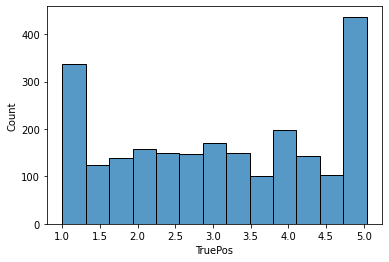

In [281]:
df_stats['TruePos'] = (df_stats['PG%'] * 1 + df_stats['SG%'] *2 + df_stats['SF%'] * 3 + df_stats['PF%'] *4 + df_stats['C%'] * 5) / 100
df_stats['TruePos']
df_stats=df_stats.drop(columns=['PG%','SG%','SF%','PF%','C%'])
df_stats

sns.histplot(df_stats['TruePos'])

In [262]:
normalized_df=(df_stats-df_stats.mean())/df_stats.std()

#No matter what clustering we will do this is the normalized dataset we will be using for it
#we might need to clean up the NaN values
normalized_df

,3P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,LostBall,Dist.,...,16-3P%FGA,0-3FG%,3-10FG%,10-16FG%,16-3PFG%,2P%A,3P%A,Dunk%FGA,C3%3PA,TruePos
0,-0.378915,-0.067335,-0.324914,0.887315,-0.659833,-0.157059,0.184097,-0.085732,0.262936,-0.770144,...,-0.930632,0.688974,0.181579,-0.484226,-0.647723,0.416199,0.706248,0.726309,1.086627,1.279822
1,-2.628763,0.999087,-2.792509,3.176929,0.093133,0.627682,1.680816,0.900942,-0.424524,-2.243607,...,-1.145976,-0.126664,0.817675,0.183229,-1.592160,-0.227849,-2.906483,0.955974,4.293315,1.404959
2,-1.934572,0.213302,0.434346,2.219454,0.577183,1.412423,0.932457,1.640947,1.825344,-1.261298,...,-0.302548,0.505685,0.649071,0.710733,-0.232171,0.273077,0.706248,0.674113,-1.474109,1.404959
3,0.340367,0.087015,0.478149,-0.736230,-0.552267,-0.941800,-0.314809,-0.579069,-0.549517,0.682854,...,-0.733234,-0.346612,0.771692,0.183229,0.504490,1.096028,0.662896,-0.181910,0.902069,-0.876954
4,0.323640,0.479908,0.025513,0.387763,-0.444700,-0.157059,0.433550,-0.455734,0.200439,0.212164,...,-0.840906,0.441533,0.595424,-0.624176,0.504490,0.676885,0.590641,0.486205,0.780953,0.867605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,0.290185,0.437812,-0.748348,1.095462,0.200700,2.197164,-0.065356,0.407605,1.012892,-1.179439,...,-0.482000,0.184928,0.480467,-0.338893,-0.524946,0.032837,0.493097,-0.223667,1.092394,0.668858
2351,0.081091,-0.642642,0.602259,-0.070160,3.212565,0.627682,-0.564262,3.244292,2.950278,0.273559,...,-0.015423,-0.887316,0.196906,0.441598,-0.099950,-1.720404,-1.378298,-0.745632,-1.260715,-1.539445
2352,-0.345460,0.465876,0.295635,1.220350,-0.014434,0.366101,0.932457,0.160937,-0.487020,-1.731988,...,-0.984468,0.294902,0.311863,-0.834101,-0.019673,1.009132,0.706248,0.705431,-1.474109,1.427042
2353,-2.628763,0.381685,-0.303013,0.637539,-0.659833,-1.203381,-0.065356,-0.209066,0.575417,-1.875241,...,-0.392274,0.038296,0.097277,0.565400,-0.241615,0.692220,-2.906483,0.110391,-1.474109,1.427042


/Users/jcs/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jcs/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0       1.279822
1       1.404959
2       1.404959
3      -0.876954
4       0.867605
          ...   
2350    0.668858
2351   -1.539445
2352    1.427042
2353    1.427042
2354    1.404959
Name: TruePos, Length: 2355, dtype: float64

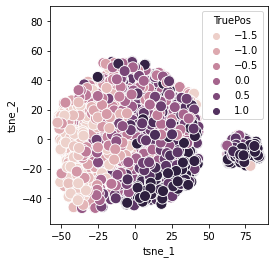

In [263]:
from sklearn.manifold import TSNE
import seaborn as sns
normalized_df=normalized_df.fillna(0)
#figure out more of these values and see how they end up impacting the values,
#maybe find out how many clear clusters we would like then run knn, would this knn show 
#properly on this data, wed do this by doing a y similar to https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/
tsne=TSNE(n_components=2)
tsne_result=tsne.fit_transform(normalized_df)
tsne_result.shape

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=120,hue = normalized_df['TruePos'])
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
normalized_df['TruePos']

<AxesSubplot:>

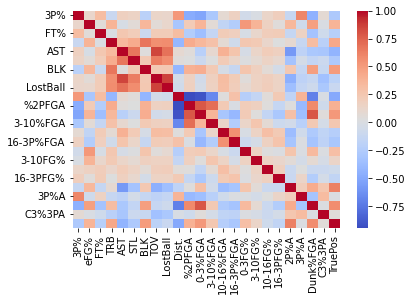

In [265]:
corr_df=normalized_df.corr()
sns.heatmap(corr_df, cmap='coolwarm')

In [149]:
#code for removing duplicates and adding TOT
new_df=df[df['Tm']=='TOT']
player_names=new_df['Player']
player_names_list=player_names.values.tolist()
print(player_names_list)
for player_name in player_names_list:
    df=df[df['Player']!=player_name]
df=df.append(new_df,ignore_index=True)
df.shape

['Nickeil Alexander-Walker', 'Mo Bamba', 'Will Barton', 'Darius Bazley', 'Malik Beasley', 'Patrick Beverley', 'Saddiq Bey', 'Goga Bitadze', 'Mikal Bridges', 'Moses Brown', 'Thomas Bryant', 'Mike Conley', 'Dewayne Dedmon', 'Spencer Dinwiddie', 'Goran Dragić', 'Kevin Durant', 'Kessler Edwards', 'Bruno Fernando', 'Dorian Finney-Smith', 'Eric Gordon', "Devonte' Graham", 'Rui Hachimura', 'R.J. Hampton', 'Josh Hart', 'George Hill', 'Justin Holiday', 'Bones Hyland', 'Kyrie Irving', 'Reggie Jackson', 'Cameron Johnson', 'Damian Jones', 'Frank Kaminsky', 'Luke Kennard', 'Kevin Knox', 'Saben Lee', 'Kevin Love', 'Sandro Mamukelashvili', 'Garrison Mathews', 'Jalen McDaniels', 'Markieff Morris', 'Mike Muscala', 'Svi Mykhailiuk', 'Kendrick Nunn', 'Jordan Nwora', 'Eugene Omoruyi', 'Gary Payton II', 'Mason Plumlee', 'Jakob Poeltl', 'Cam Reddish', 'Davon Reed', 'Josh Richardson', 'Terrence Ross', "D'Angelo Russell", 'Matt Ryan', 'Dario Šarić', 'Terry Taylor', 'Matisse Thybulle', 'Juan Toscano-Anderson',

/var/folders/t1/7_qdq8vd1lx8zl_v58gp_g380000gn/T/ipykernel_29758/118503986.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(new_df,ignore_index=True)


(1518, 85)